In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D


In [5]:
from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

test.csv
train.csv



In [7]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [8]:
x_train = (train.iloc[:,1:].values).astype('float32')
y_train = train.iloc[:,0].values.astype('int32')
x_test = test.values.astype('float32')

In [11]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_train.shape

(42000, 28, 28, 1)

In [12]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_test.shape

(28000, 28, 28, 1)

In [13]:
#Standardize Data
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)
def standardize(x):
    return (x - mean_px)/std_px

In [14]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
classes = y_train.shape[1]

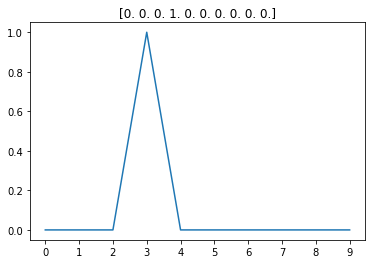

In [17]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

In [24]:
x = x_train
y = y_train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(x_train, y_train, batch_size=64)
val_batches=gen.flow(x_val, y_val, batch_size=64)

In [19]:
def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(axis=1),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [21]:
model = get_cnn_model()
model.optimizer.lr = 0.01

In [25]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
  144/37800 [..............................] - ETA: 6:40:31 - loss: 0.6446 - acc: 0.7827

KeyboardInterrupt: 